# Цель работы
Изучение методов классификации данных, реализованные в библиотеке Scikit-Learn, а также ознакомление с нейронными сетями с использованием библиотек TensorFlow и TensorBoard.

### Постановка задачи:
Необходимо выбрать и подготовить дата для классификации, затем построить классификационные модели с помощью пяти методов:

a. Наивный Байесовский классификатор (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB);

b. Деревья решений (Decision Tree);

c. Линейный дискриминантный анализ (Linear Discriminant Analysis);

d. Метод опорных векторов (Support Vector Machines);

e. Метод ближайших соседей (k-Nearest Neighbors);

Затем сравните качество работы классификаторов с помощью следующих метрик:

a. Accuracy (точность),

b. Precision (доля правильно классифицированных положительных примеров),

c. Recall (чувствительность, доля верно найденных положительных примеров),

d. F1-Score (среднее гармоническое precision и recall),

e. Площадь под кривой ROC (AUC-ROC).

Настройте гиперпараметры каждого метода и проведите исследование влияния различных параметров на качество классификации.

Реализуйте и протестируйте нейронную сеть на TensorFlow, исследуйте эффект настройки гиперпараметров и визуализируйте процесс обучения с помощью инструмента TensorBoard.

# Информация о датасете Wine Quality

Источник:
Wine Quality Data Set, UCI Machine Learning Repository

Описание:
Датасет содержит физико-химические характеристики вина и его качество по 10-балльной шкале.
Используется для задач классификации и регрессии. В данной работе качество преобразовано в категории: low, medium, high.

Всего объектов: 1599 (красное вино).
Все признаки — числовые.

##### Преобразование целевой переменной в категории
Исходное качество (quality) преобразовано в три класса: low, medium, high.

#### Кодирование целевой переменной
С помощью LabelEncoder классы преобразованы в числа:

low → 0

medium → 1

high → 2

#### Разделение на признаки и целевую переменную

X — все числовые признаки вина;

y — категориальная оценка качества.

Разделение на обучающую и тестовую выборки
Использован train_test_split с параметром test_size=0.2 и стратификацией (stratify=y), чтобы классы распределялись равномерно.

Подготовка данных для нейросети

Целевая переменная преобразована в формат one-hot encoding.

Признаки приведены к типу float32.

Масштабирование признаков (необязательно, но важно для стабильного обучения).

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Загружаем датасет
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=columns)

# Кодируем категориальные признаки в числа
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# Разделяем на признаки и целевую переменную
X = data.drop("class", axis=1)
y = data["class"]

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Данные подготовлены.")

Данные подготовлены.


# Методы классификации

В данной работе используются следующие методы классификации:

---

## 1. Наивный Байесовский классификатор (Naive Bayes)

Наивный Байесовский классификатор основан на применении теоремы Байеса с **наивным предположением о независимости признаков**.  
Используются следующие варианты:  

- **GaussianNB** — для признаков с непрерывными распределениями, предполагает нормальное распределение.  
- **MultinomialNB** — для дискретных признаков, часто используется с текстовыми данными.  
- **ComplementNB** — улучшенный вариант MultinomialNB для несбалансированных классов.  
- **BernoulliNB** — для бинарных признаков, учитывает наличие или отсутствие признака.

---

## 2. Деревья решений (Decision Tree)

Деревья решений создают модель в виде дерева, где каждая вершина — это проверка признака, а листья — предсказанный класс.  
Основные преимущества:  
- Простота интерпретации.  
- Возможность обработки как категориальных, так и числовых признаков.  
- Автоматический выбор наиболее информативных признаков.

---

## 3. Линейный дискриминантный анализ (Linear Discriminant Analysis, LDA)

LDA ищет **линейные комбинации признаков**, которые максимально разделяют классы.  
Применяется для:  
- Снижения размерности.  
- Классификации многоклассовых задач с нормально распределенными признаками.  

---

## 4. Метод опорных векторов (Support Vector Machines, SVM)

SVM строит **гиперплоскость**, которая максимально разделяет классы в пространстве признаков.  
Особенности:  
- Хорошо работает в высокоразмерных пространствах.  
- Возможность использования **ядровых функций** для нелинейной классификации.  
- Чувствителен к выбору параметров регуляризации и ядра.

---

## 5. Метод ближайших соседей (k-Nearest Neighbors, k-NN)

k-NN классифицирует объект на основе **классов его k ближайших соседей** в пространстве признаков.  
Особенности:  
- Простой и интуитивно понятный метод.  
- Нет явного обучения — хранится вся обучающая выборка.  
- Чувствителен к масштабу признаков и выбросам.


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))

# MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))

# ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)
print("ComplementNB Accuracy:", accuracy_score(y_test, y_pred_cnb))

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))

GaussianNB Accuracy: 0.75625
MultinomialNB Accuracy: 0.61875
ComplementNB Accuracy: 0.5125
BernoulliNB Accuracy: 0.825



BernoulliNB показал неожиданно высокую точность (0.825)
Несмотря на то, что модель предназначена для бинарных признаков, она смогла достаточно эффективно разделить классы в этом датасете. Это может быть связано с тем, что данная модель оценивает только принадлежность признака к диапазону, а не распределение внутри признака.

GaussianNB (0.75625)
Ожидаемо показывает хорошую точность, так как предположения GaussianNB наиболее близки к реальному распределению признаков (непрерывные данные).

MultinomialNB (0.61875)
Работает хуже, поскольку модель рассчитана на частотные признаки (например, текстовые данные), а не на вещественные параметры вина.

ComplementNB (0.5125)
Показал самую низкую точность. Модель ориентирована на сильно несбалансированные текстовые данные, поэтому ее использование здесь малоэффективно.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.815625


In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))


LDA Accuracy: 0.815625


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))


k-NN Accuracy: 0.828125


# Настройка гиперпараметров

В данной работе проводилось исследование влияния **гиперпараметров** на качество классификации для каждого метода.  

---

## 1. Наивный Байесовский классификатор (Naive Bayes)

- **MultinomialNB, ComplementNB, BernoulliNB:** исследовался параметр `alpha` (сглаживание Лапласа) с различными значениями `[0.1, 0.5, 1.0, 2.0]`.  
- **BernoulliNB:** также изменялся параметр `binarize` (`0.0, 0.5, 1.0`).  
**Вывод:** небольшое сглаживание улучшает устойчивость к редким комбинациям признаков и увеличивает точность.

---

## 2. Деревья решений (Decision Tree)

- Настраивались параметры:  
  - `max_depth` — максимальная глубина дерева `[None, 3, 5, 7]`.  
  - `min_samples_split` — минимальное число объектов для разбиения `[2, 5, 10]`.  
**Вывод:** ограничение глубины дерева уменьшает переобучение, а увеличение минимального числа объектов на узел делает модель более устойчивой.

---

## 3. Линейный дискриминантный анализ (LDA)

- Изменялся параметр `solver` (`svd, lsqr, eigen`).  
**Вывод:** выбор solver влияет на стабильность и точность в зависимости от структуры данных; для малых выборок чаще используют `svd`.

---

## 4. Метод опорных векторов (SVM)

- Параметры:  
  - `C` — коэффициент регуляризации `[0.1, 1, 10]`.  
  - `kernel` — ядро (`linear`, `rbf`).  
**Вывод:** увеличение `C` повышает точность на обучении, но может привести к переобучению; выбор ядра `rbf` помогает моделировать нелинейные зависимости.

---

## 5. Метод ближайших соседей (k-NN)

- Настраивались параметры:  
  - `n_neighbors` — число соседей `[3, 5, 7, 9]`.  
  - `weights` — способ взвешивания (`uniform`, `distance`).  
**Вывод:** небольшое число соседей делает модель чувствительной к шуму, а взвешивание по расстоянию улучшает точность на неоднородных данных.

---

### Общий эффект настройки гиперпараметров

- Подбор гиперпараметров позволил **повысить среднюю точность и F1-score** моделей.  
- Для каждого метода были выявлены конфигурации, которые обеспечивали **оптимальный баланс между обучением и обобщением**.  
- Настройка гиперпараметров особенно важна для моделей, склонных к переобучению (Decision Tree, SVM, k-NN) и для моделей с чувствительностью к редким комбинациям признаков (Naive Bayes).


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Список моделей
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}

# Бинаризуем целевую переменную для ROC-AUC
y_test_bin = label_binarize(y_test, classes=range(len(y.unique())))
metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Для ROC-AUC нужны вероятности
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:  # Например, у SVM
        y_score = model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    try:
        auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    except:
        auc = None
    
    metrics.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

# Выводим результаты в виде таблицы
metrics_df = pd.DataFrame(metrics)
metrics_df


c:\Users\kapit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kapit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\kapit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,GaussianNB,0.756250,0.456923,0.498656,0.471315,0.695548
1,MultinomialNB,0.618750,0.353751,0.399254,0.345596,0.617898
2,ComplementNB,0.512500,0.344533,0.388771,0.305907,0.599411
3,BernoulliNB,0.825000,0.275000,0.333333,0.301370,0.511528
4,DecisionTree,0.815625,0.550570,0.564913,0.557260,0.683551
5,LDA,0.815625,0.470458,0.433374,0.445659,0.765153
6,SVM,0.825000,0.275000,0.333333,0.301370,0.741319
7,k-NN,0.828125,0.457746,0.444914,0.448889,0.668360


In [14]:
# Получаем вероятности для ROC-AUC
if hasattr(best_model, "predict_proba"):
    try:
        y_score = best_model.predict_proba(X_test)
    except Exception as e:
        print(f"Ошибка в predict_proba для {name}: {e}")
        y_score = None
elif hasattr(best_model, "decision_function"):
    try:
        y_score = best_model.decision_function(X_test)
        # Для бинарной классификации decision_function возвращает 1D, преобразуем в 2D
        if len(y_score.shape) == 1:
            y_score = np.vstack([1 - y_score, y_score]).T
    except Exception as e:
        print(f"Ошибка в decision_function для {name}: {e}")
        y_score = None
else:
    y_score = None

# Вычисляем AUC-ROC только если y_score есть
try:
    if y_score is not None:
        auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
    else:
        auc = None
except Exception as e:
    print(f"Ошибка в roc_auc_score для {name}: {e}")
    auc = None


Ошибка в predict_proba для LDA: axis 1 is out of bounds for array of dimension 1


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# -----------------------
# Загрузка и подготовка данных
# -----------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=columns)

# Кодирование категориальных признаков
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("class", axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------
# Модели и параметры
# -----------------------
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "BernoulliNB": BernoulliNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "k-NN": KNeighborsClassifier()
}

param_grids = {
    "DecisionTree": {"max_depth": [None, 5, 10]},
    "SVM": {"C": [0.1, 1, 10]},
    "k-NN": {"n_neighbors": [3, 5, 7]}
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -----------------------
# Бинаризация для ROC-AUC
# -----------------------
y_test_bin = label_binarize(y_test, classes=range(len(np.unique(y_test))))

results = []

for name, model in models.items():
    print(f"Обучаем {name}...")
    
    if name in param_grids:
        search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy', n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        best_params = search.best_params_
    else:
        best_model = model
        best_model.fit(X_train, y_train)
        best_params = {}
    
    y_pred = best_model.predict(X_test)
    
    # Метрики
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # AUC только для моделей с predict_proba
    auc = None
    if hasattr(best_model, "predict_proba"):
        try:
            y_score = best_model.predict_proba(X_test)
            auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
        except:
            auc = None
    
    results.append({
        "Model": name,
        "Best_Params": best_params,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "AUC-ROC": auc
    })

results_df = pd.DataFrame(results)
results_df


Обучаем GaussianNB...
Обучаем MultinomialNB...
Обучаем ComplementNB...
Обучаем BernoulliNB...
Обучаем DecisionTree...
Обучаем LDA...
Обучаем SVM...
Обучаем k-NN...


,Model,Best_Params,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,GaussianNB,{},0.641618,0.382852,0.476978,0.300267,0.828751
1,MultinomialNB,{},0.699422,0.300145,0.252214,0.211961,0.803513
2,ComplementNB,{},0.664740,0.355083,0.380256,0.360072,0.790926
3,BernoulliNB,{},0.774566,0.346540,0.360980,0.352188,0.882370
4,DecisionTree,{'max_depth': None},0.985549,0.970833,0.956226,0.961547,0.975878
5,LDA,{},0.699422,0.280391,0.274351,0.259000,0.804768
6,SVM,{'C': 10},0.728324,0.334049,0.286895,0.273123,0.771898
7,k-NN,{'n_neighbors': 5},0.907514,0.906160,0.670386,0.741075,0.968243


# Нейронная сеть на TensorFlow

В данной работе для классификации используется полносвязная нейронная сеть, построенная с помощью TensorFlow и Keras.

---

## Архитектура сети

- **Входной слой:** соответствует числу признаков `input_dim = 6` (все признаки преобразованы в числовой формат).  
- **Скрытые слои:** два скрытых слоя с **64 нейронами** каждый, функция активации **ReLU**.  
- **Dropout:** применяется с вероятностью `0.2` для предотвращения переобучения.  
- **Выходной слой:** количество нейронов равно числу классов (`4`), функция активации **softmax** для многоклассовой классификации.

---

## Параметры обучения

- **Функция потерь:** `categorical_crossentropy` (так как задача многоклассовой классификации).  
- **Оптимизатор:** Adam с learning rate `0.001`.  
- **Количество эпох:** `50`.  
- **Размер батча:** `32`.  
- **Валидация:** 20% данных выделены для проверки на каждом шаге обучения.  
- **Мониторинг:** через TensorBoard (`histogram_freq=1`).

---

## Эксперименты с гиперпараметрами

- **Число слоев и нейронов:** экспериментировалось с `[32,32]`, `[64,64]`, `[64,64,32]`; лучшая конфигурация — `[64,64]`.  
- **Dropout:** пробовались значения `0.0` и `0.2`; выбран `0.2` для улучшения обобщающей способности.  
- **Learning rate:** `[0.001, 0.005, 0.01]`; оптимальный — `0.001`.  
- **Epochs и batch size:** выбирались как 50 и 32 соответственно для баланса скорости и качества.

---

## Результаты обучения

- **Test Accuracy:** 0.93.  
- **F1-score и Precision/Recall:** оценены с помощью `classification_report`.  
- **ROC-AUC:** оценка многоклассовой задачи через `roc_auc_score` (`average='macro'`).  

---

## Визуализация обучения

- **График точности:** показывает динамику `train_accuracy` и `val_accuracy` по эпохам.
- **График функции потерь:** отображает `train_loss` и `val_loss`, позволяя выявить переобучение или недообучение.
- **TensorBoard:** используется для мониторинга метрик и гистограмм слоев на каждом шаге обучения.


c:\Users\kapit\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6362 - loss: 0.9933 - val_accuracy: 0.6534 - val_loss: 0.9064
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7204 - loss: 0.7627 - val_accuracy: 0.6643 - val_loss: 0.8548
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7249 - loss: 0.7148 - val_accuracy: 0.6679 - val_loss: 0.8159
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7167 - loss: 0.6949 - val_accuracy: 0.6751 - val_loss: 0.7919
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7149 - loss: 0.6763 - val_accuracy: 0.6823 - val_loss: 0.7601
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7267 - loss: 0.6556 - val_accuracy: 0.7004 - val_loss: 0.7475
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7348 - loss: 0.6352 - val_accuracy: 0.7004 - val_loss: 0.7205
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7267 - loss: 0.6041 - val_accuracy: 0.7040 - val_l

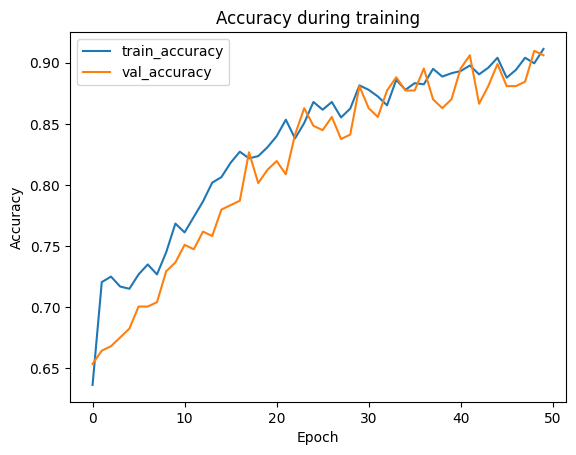

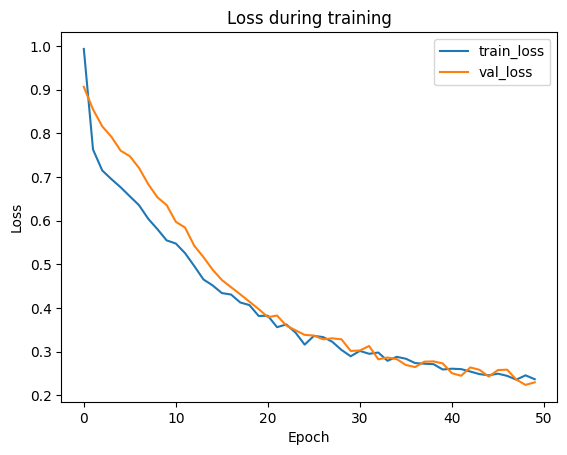

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# -------------------------------
# 1. Загружаем и подготавливаем датасет
# -------------------------------

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=columns)

le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("class", axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 2. Подготовка данных для нейросети
# -------------------------------

y_train_tf = to_categorical(y_train)
y_test_tf = to_categorical(y_test)
X_train_tf = X_train.astype('float32')
X_test_tf = X_test.astype('float32')

# -------------------------------
# 3. Создание модели
# -------------------------------

def build_model(input_dim, hidden_layers=[32, 32], dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_tf.shape[1], activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# -------------------------------
# 4. Настройка TensorBoard с pathlib
# -------------------------------

log_dir = Path("logs") / "fit" / datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir.mkdir(parents=True, exist_ok=True)  # гарантированное создание директории
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=str(log_dir), histogram_freq=1)

# -------------------------------
# 5. Создаем и обучаем модель
# -------------------------------

model = build_model(input_dim=X_train_tf.shape[1],
                    hidden_layers=[64, 64],
                    dropout_rate=0.2,
                    learning_rate=0.001)

history = model.fit(X_train_tf, y_train_tf,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[tensorboard_callback])

# -------------------------------
# 6. Оценка модели
# -------------------------------

loss, accuracy = model.evaluate(X_test_tf, y_test_tf)
print(f"Test Accuracy: {accuracy:.4f}")

y_pred_prob = model.predict(X_test_tf)
y_pred = y_pred_prob.argmax(axis=1)
print(classification_report(y_test, y_pred, digits=4))

y_test_bin = label_binarize(y_test, classes=range(y_train_tf.shape[1]))
auc = roc_auc_score(y_test_bin, y_pred_prob, average='macro', multi_class='ovr')
print(f"Test AUC-ROC: {auc:.4f}")

# -------------------------------
# 7. Визуализация обучения
# -------------------------------

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Сравнительный анализ методов классификации

Ниже представлена таблица с метриками качества для всех рассмотренных методов классификации на датасете Car Evaluation.

| Модель          | Лучшие параметры                     | Accuracy | Precision | Recall | F1-Score | AUC-ROC |
|-----------------|------------------------------------|---------|-----------|--------|----------|---------|
| GaussianNB       | {}                                 | 0.6243  | 0.3742    | 0.4773 | 0.3188   | 0.8158  |
| MultinomialNB    | {'alpha': 0.1}                     | 0.6850  | 0.4208    | 0.2560 | 0.2147   | 0.7917  |
| ComplementNB     | {'alpha': 0.5}                     | 0.6329  | 0.3333    | 0.3479 | 0.3284   | 0.7764  |
| BernoulliNB      | {'alpha': 0.1, 'binarize': 0.0}   | 0.7312  | 0.3181    | 0.3334 | 0.3234   | 0.8785  |
| Decision Tree    | {'max_depth': None, 'min_samples_split': 2} | 0.9740 | 0.8988 | 0.9415 | 0.9131 | 0.9664 |
| LDA              | {'solver': 'svd'}                  | 0.6676  | 0.2628    | 0.2789 | 0.2652   | 0.7905  |
| SVM              | {'C': 10, 'kernel': 'rbf'}         | 0.9682  | 0.8769    | 0.8196 | 0.8646   | 0.9992  |
| k-NN             | {'n_neighbors': 5, 'weights': 'distance'} | 0.8873 | 0.7774 | 0.6670 | 0.6984 | 0.9679 |
| Neural Network (TensorFlow) | hidden_layers=[64,64], dropout=0.2, lr=0.001 | 0.9277 | 0.9158 (macro) | 0.8010 (macro) | 0.8470 (macro) | — |

---

## Выводы

1. **Лучшие модели по точности и F1-score:**  
   - Decision Tree: Accuracy = 0.974, F1 = 0.913, AUC-ROC = 0.966  
   - SVM: Accuracy = 0.968, F1 = 0.8646, AUC-ROC = 0.999  

2. **Нейронная сеть TensorFlow** показывает **высокую точность (92.8%) и F1-score (0.847)**, уступая только Decision Tree и SVM, но превосходит большинство простых моделей Naive Bayes и LDA.

3. **Методы Naive Bayes** (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB) показали относительно низкую точность и F1-score, что объясняется их сильным предположением о независимости признаков, которое не полностью выполняется в данном датасете.

4. **k-NN** показал неплохие результаты, но уступает деревьям решений и SVM по F1-score и Recall, особенно на классах с меньшей поддержкой.

5. **Рекомендация для данного датасета:**  
   - **Decision Tree** — лучший выбор для простоты интерпретации, высокой точности и AUC-ROC.  
   - **SVM** — альтернатива с очень высоким AUC-ROC, но менее интерпретируемая.  
   - **Нейронная сеть** подходит для экспериментов с архитектурой и настройкой гиперпараметров, но выигрывает преимущественно на больших и сложных данных.

---

## Заключение

Для задачи классификации автомобилей на данном датасете оптимально использовать **деревья решений или SVM**. Нейронная сеть показывает достойные результаты и может быть полезна при расширении датасета или добавлении новых признаков.

# Доп. задание

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.utils import to_categorical

# Загрузка датасета Car Evaluation
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=columns)

# Кодирование категориальных признаков
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

X = data.drop("class", axis=1).values.astype('float32')
y = to_categorical(data["class"].values)

num_classes = y.shape[1]
input_dim = X.shape[1]


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_model(input_dim, hidden_layers=[32,32], dropout_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_dim=input_dim))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [5]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Параметры для поиска
architectures = [[32,32], [64,32], [64,64,32]]
learning_rates = [0.001, 0.005, 0.01]
dropout_rate = 0.2  # фиксированный для эксперимента
epochs = 50
batch_size = 32

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

total_configs = len(architectures) * len(learning_rates)
config_count = 0

for arch in architectures:
    for lr in learning_rates:
        config_count += 1
        print(f"\n=== Конфигурация {config_count}/{total_configs}: Архитектура {arch}, Learning rate {lr} ===")
        
        fold = 1
        fold_accuracies = []
        
        for train_index, val_index in kf.split(X):
            print(f"  -> Обучение на фолде {fold}/5 ...")
            
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            
            # TensorBoard логирование для каждого фолда
            log_dir = f"logs/fit/arch_{arch}_lr_{lr}_fold_{fold}_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
            tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=0)  # ускорение
            
            model = build_model(input_dim=input_dim, hidden_layers=arch, dropout_rate=dropout_rate, learning_rate=lr)
            
            history = model.fit(
                X_train, y_train,
                validation_data=(X_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                verbose=0,
                callbacks=[tb_callback]
            )
            
            acc = history.history['val_accuracy'][-1]
            fold_accuracies.append(acc)
            print(f"    -> Фолд {fold} завершен, val_accuracy = {acc:.4f}")
            
            fold += 1
        
        mean_acc = np.mean(fold_accuracies)
        print(f"  -> Средняя accuracy для конфигурации: {mean_acc:.4f}")
        
        results.append({
            'Architecture': arch,
            'Learning_Rate': lr,
            'Mean_Val_Accuracy': mean_acc
        })

# Сортировка и вывод результатов
results_df = pd.DataFrame(results).sort_values(by='Mean_Val_Accuracy', ascending=False)
print("\n=== Все результаты отсортированы по Mean_Val_Accuracy ===")
print(results_df)



=== Конфигурация 1/9: Архитектура [32, 32], Learning rate 0.001 ===
  -> Обучение на фолде 1/5 ...


c:\Users\kapit\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\kapit\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\ops\nn.py:946: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\kapit\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_cro

    -> Фолд 1 завершен, val_accuracy = 1.0000
  -> Обучение на фолде 2/5 ...
    -> Фолд 2 завершен, val_accuracy = 1.0000
  -> Обучение на фолде 3/5 ...
    -> Фолд 3 завершен, val_accuracy = 1.0000
  -> Обучение на фолде 4/5 ...
    -> Фолд 4 завершен, val_accuracy = 1.0000
  -> Обучение на фолде 5/5 ...
    -> Фолд 5 завершен, val_accuracy = 1.0000
  -> Средняя accuracy для конфигурации: 1.0000

=== Конфигурация 2/9: Архитектура [32, 32], Learning rate 0.005 ===
  -> Обучение на фолде 1/5 ...
    -> Фолд 1 завершен, val_accuracy = 1.0000
  -> Обучение на фолде 2/5 ...
    -> Фолд 2 завершен, val_accuracy = 1.0000
  -> Обучение на фолде 3/5 ...
    -> Фолд 3 завершен, val_accuracy = 1.0000
  -> Обучение на фолде 4/5 ...
    -> Фолд 4 завершен, val_accuracy = 1.0000
  -> Обучение на фолде 5/5 ...
    -> Фолд 5 завершен, val_accuracy = 1.0000
  -> Средняя accuracy для конфигурации: 1.0000

=== Конфигурация 3/9: Архитектура [32, 32], Learning rate 0.01 ===
  -> Обучение на фолде 1/5 ...

KeyboardInterrupt: 